In [62]:
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns

In [4]:
df = pd.read_csv("curated-solubility-dataset.csv")

In [6]:
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [7]:
df.dtypes

ID                      object
Name                    object
InChI                   object
InChIKey                object
SMILES                  object
Solubility             float64
SD                     float64
Ocurrences               int64
Group                   object
MolWt                  float64
MolLogP                float64
MolMR                  float64
HeavyAtomCount         float64
NumHAcceptors          float64
NumHDonors             float64
NumHeteroatoms         float64
NumRotatableBonds      float64
NumValenceElectrons    float64
NumAromaticRings       float64
NumSaturatedRings      float64
NumAliphaticRings      float64
RingCount              float64
TPSA                   float64
LabuteASA              float64
BalabanJ               float64
BertzCT                float64
dtype: object

In [53]:
df.describe()

,Solubility,SD,Ocurrences,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,-2.889909,0.067449,1.378081,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,467.336782
std,2.368154,0.234702,1.023476,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,546.631696
min,-13.171900,0.000000,1.000000,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000
25%,-4.326325,0.000000,1.000000,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,163.243343
50%,-2.618173,0.000000,1.000000,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,351.640433
75%,-1.209735,0.000000,1.000000,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.562848
max,2.137682,3.870145,38.000000,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708


In [8]:
df.columns

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

In [12]:
df.sort_values("Group",ascending=False)

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
9981,I-94,warfarin,InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-...,PJVWKTKQMONHTI-UHFFFAOYSA-N,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,-4.780000,0.450506,3,G5,308.333,...,4.0,116.0,3.0,0.0,0.0,3.0,67.51,132.552025,2.258072e+00,909.550973
9935,H-574,Prasterone,InChI=1S/C19H28O2/c1-18-9-7-13(20)11-12(18)3-4...,FMGSKLZLMKYGDP-UHFFFAOYSA-N,CC12CCC3C(CC=C4CC(O)CCC43C)C1CCC2=O,-4.010000,0.196129,3,G5,288.431,...,0.0,116.0,0.0,3.0,4.0,4.0,37.30,127.551037,1.692355e+00,507.695743
3781,B-210,heptachlor,InChI=1S/C10H5Cl7/c11-4-2-1-3-5(4)9(15)7(13)6(...,FRCCEHPWNOQAEU-UHFFFAOYSA-N,ClC1C=CC2C1C3(Cl)C(=C(Cl)C2(Cl)C3(Cl)Cl)Cl,-6.316800,0.435874,3,G5,373.321,...,0.0,94.0,0.0,1.0,3.0,3.0,0.00,133.749894,2.317184e+00,467.274872
2598,A-4356,2-hydroxy-2-phenylacetic acid,InChI=1S/C8H8O3/c9-7(8(10)11)6-4-2-1-3-5-6/h1-...,IWYDHOAUDWTVEP-UHFFFAOYSA-N,OC(C(O)=O)c1ccccc1,-0.032127,0.077872,5,G5,152.149,...,2.0,58.0,1.0,0.0,0.0,1.0,57.53,63.911277,2.851178e+00,242.773900
2903,A-4862,trilithium(1+) ion phosphate,"InChI=1S/3Li.H3O4P/c;;;1-5(2,3)4/h;;;(H3,1,2,3...",TWQULNDIKKJZPH-UHFFFAOYSA-K,[Li+].[Li+].[Li+].[O-][P]([O-])([O-])=O,-2.590926,0.027144,3,G5,115.793,...,0.0,32.0,0.0,0.0,0.0,0.0,86.25,83.199317,-2.666667e-08,57.419012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9457,F-831,3-hydroxy-5-(5-oxo-1-cyclopentenyl)pentanoic acid,InChI=1S/C10H14O4/c11-8(6-10(13)14)5-4-7-2-1-3...,YKZYNOWDVPDSMO-UHFFFAOYSA-N,O=C(O)CC(O)CCC1=CCCC1=O,-0.400000,0.000000,1,G1,198.218,...,5.0,78.0,0.0,0.0,1.0,1.0,74.60,82.239808,2.260298e+00,267.295564
9458,F-832,"Octane-1,2-diyldinitrate",InChI=1S/C8H18N2O6/c1-2-3-4-5-6-8(16-10(13)14)...,NTAHVPRDOLPMJC-UHFFFAOYSA-N,CCCCCCC(CO[N+](=O)O)O[N+](=O)O,-4.330000,0.000000,1,G1,238.240,...,10.0,94.0,0.0,0.0,0.0,0.0,99.08,92.734965,3.802404e+00,222.574075
9459,F-834,1-[(4-chlorophenyl)methyl]-5-fluoropyrimidine-...,InChI=1S/C11H8ClFN2O2/c12-8-3-1-7(2-4-8)5-15-6...,FWLNZTGNVCRKCU-UHFFFAOYSA-N,O=C1NC(=O)N(CC2=CC=C(Cl)C=C2)C=C1F,-3.490000,0.000000,1,G1,254.648,...,2.0,88.0,2.0,0.0,0.0,2.0,54.86,100.294553,2.363540e+00,645.756386
9460,F-836,5-fluoro-1-[(4-methoxyphenyl)methyl]pyrimidine...,InChI=1S/C12H11FN2O3/c1-18-9-4-2-8(3-5-9)6-15-...,IWTFDHOAOPEINT-UHFFFAOYSA-N,COC1=CC=C(CN2C=C(F)C(=O)NC2=O)C=C1,-2.750000,0.000000,1,G1,250.229,...,3.0,94.0,2.0,0.0,0.0,2.0,64.09,101.469774,2.306124e+00,658.258120


In [15]:
tqdm.pandas()

In [16]:
df['Mol'] = df.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/9982 [00:00<?, ?it/s]

RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:48:26] WARNING: not r

In [17]:
query = Chem.MolFromSmarts("c1ccccn1")

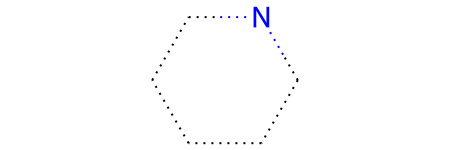

In [18]:
query

In [19]:
df['pyridine'] = [x.HasSubstructMatch(query) for x in tqdm(df.Mol)]

  0%|          | 0/9982 [00:00<?, ?it/s]

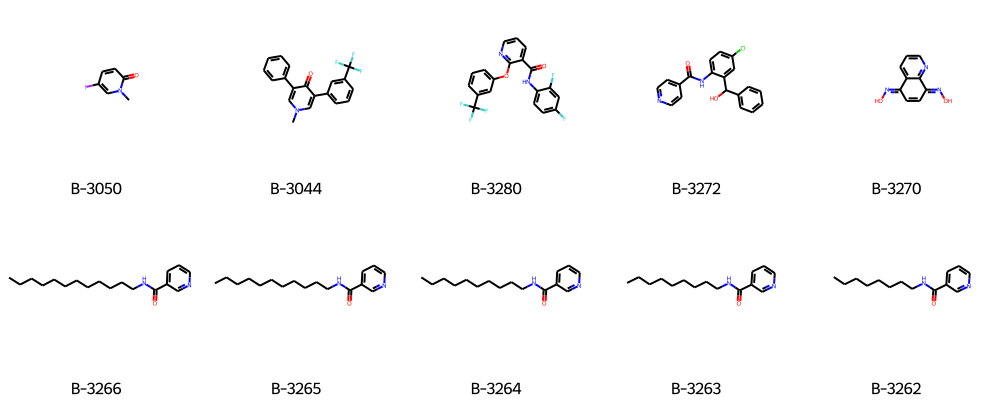

In [36]:
hits = df.query("pyridine").head(10)
MolsToGridImage(hits.Mol,legends=hits.ID.to_list(),molsPerRow=5)

In [43]:
match_list = [x.GetSubstructMatch(query) for x in hits.Mol]

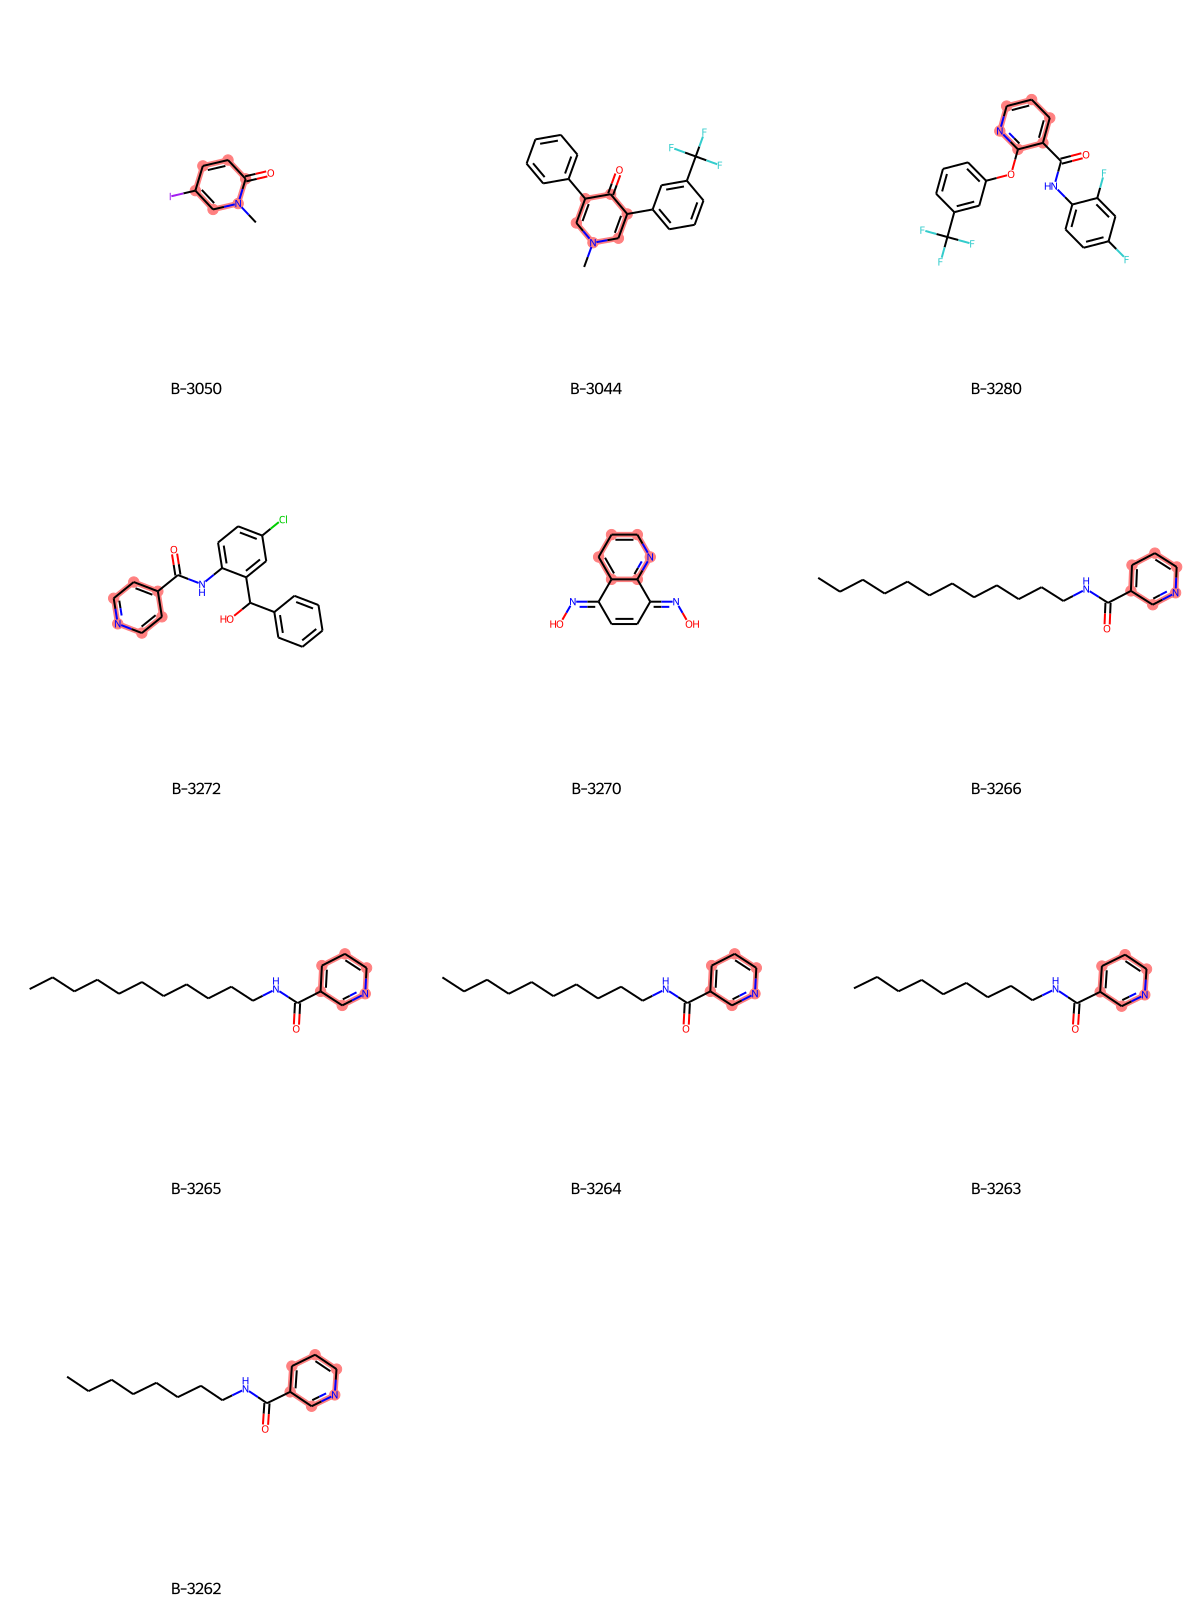

In [52]:
MolsToGridImage(hits.Mol,legends=hits.ID.to_list(),molsPerRow=3,highlightAtomLists=match_list,subImgSize=(400, 400))

In [61]:
res = []
for k,v in df.groupby("Group"):
    res.append([k,len(v),v.Solubility.mean()])
res_df = pd.DataFrame(res,columns=["Group","Size","Mean"]).round(decimals=2)
res_df

,Group,Size,Mean
0,G1,7746,-2.86
1,G2,235,-4.05
2,G3,1182,-2.79
3,G4,183,-3.81
4,G5,636,-2.68


<AxesSubplot:title={'center':'Solubility'}, xlabel='Group'>

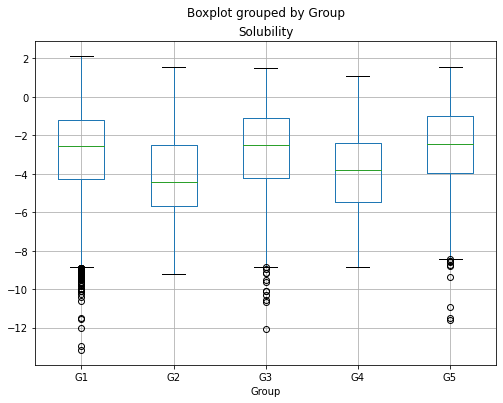

In [69]:
df.boxplot(column="Solubility",by="Group",figsize=(8,6))

<AxesSubplot:xlabel='Group', ylabel='Solubility'>

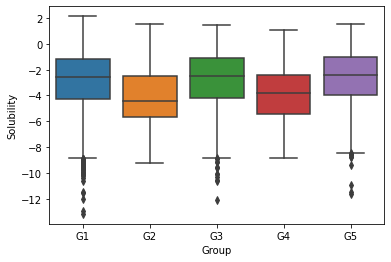

In [63]:
sns.boxplot(x="Group",y="Solubility",data=df)